# Load Data

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#load cities dataset
df_cities = pd.read_csv("/content/drive/My Drive/Data Science with Python Spring2020/week6_26feb2020/assignment3/500Cities_cleandata_ReadyForEDA(1).csv")

In [4]:
####################################
# Summarize Data

# Descriptive statistics
# shape
print(df_cities.shape)
# head
print(df_cities.head(20))
# data type 
print(df_cities.dtypes)
# descriptions
print(df_cities.describe())

(500, 34)
    Unnamed: 0 StateAbbr  ... TEETHLOST_CrudePrev                       Geolocation
0            1        CA  ...                 6.8  (38.67504943280, -121.147605753)
1            2        FL  ...                18.3  (27.90909077340, -82.7714203383)
2            3        CA  ...                 6.7  (37.87256787650, -122.274907975)
3            4        CA  ...                11.2  (38.29804246490, -122.301093331)
4            5        FL  ...                16.2  (26.15468783030, -80.2998411020)
5            6        FL  ...                14.1  (26.01273875340, -80.3384522664)
6            7        NJ  ...                26.1  (40.22372899810, -74.7639943311)
7            8        CO  ...                17.7  (38.27339572510, -104.612001218)
8            9        WI  ...                16.9  (42.72745994940, -87.8134530240)
9           10        WA  ...                13.6  (47.30385443250, -122.210810557)
10          11        TX  ...                10.1  (30.30686103420

# Data Pre-processing

In [5]:
missing_values = df_cities.isnull().sum(axis=0)
missing_values

Unnamed: 0                 0
StateAbbr                  0
PlaceName                  0
PlaceFIPS                  0
Population2010             0
ACCESS2_CrudePrev          0
ARTHRITIS_CrudePrev        0
BINGE_CrudePrev            0
BPHIGH_CrudePrev           0
BPMED_CrudePrev            0
CANCER_CrudePrev           0
CASTHMA_CrudePrev          0
CHD_CrudePrev              0
CHECKUP_CrudePrev          0
CHOLSCREEN_CrudePrev       0
COLON_SCREEN_CrudePrev     0
COPD_CrudePrev             0
COREM_CrudePrev            0
COREW_CrudePrev            0
CSMOKING_CrudePrev         0
DENTAL_CrudePrev           0
DIABETES_CrudePrev         0
HIGHCHOL_CrudePrev         0
KIDNEY_CrudePrev           0
LPA_CrudePrev              0
MAMMOUSE_CrudePrev         0
MHLTH_CrudePrev            0
OBESITY_CrudePrev          0
PAPTEST_CrudePrev         47
PHLTH_CrudePrev            0
SLEEP_CrudePrev            0
STROKE_CrudePrev           0
TEETHLOST_CrudePrev        0
Geolocation                0
dtype: int64

In [6]:
#removing 47 missing values 
#drop NaN rows
df_cities = df_cities.dropna()
df_cities.shape

(453, 34)

In [0]:
#Set the random seed to “123”. 
np.random.seed(123)

In [8]:
#Shuffle the rows in your dataset
#df_cities.apply(np.random.shuffle(df_cities.values),axis=0)
from sklearn.utils import shuffle
df_cities = shuffle(df_cities)
df_cities

,Unnamed: 0,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation
52,53,IL,Rockford,1765000,152871,15.5,28.7,16.6,34.9,77.6,6.7,10.4,7.4,68.3,72.5,58.2,8.2,32.1,26.7,22.8,56.3,11.9,39.0,3.4,30.3,72.4,13.8,36.3,82.5,15.2,38.8,4.0,18.6,"(42.26331800150, -89.0625958362)"
96,97,TX,Pearland,4856348,91252,15.1,18.2,19.2,27.0,73.3,5.0,8.0,4.0,68.8,77.3,65.2,3.9,34.5,33.9,14.0,68.9,8.2,33.1,2.1,19.6,77.9,9.8,28.4,81.9,8.9,32.3,1.9,8.6,"(29.55848505770, -95.3208389111)"
36,37,NM,Santa Fe,3570500,67947,10.8,26.6,14.7,27.0,75.7,6.8,9.3,6.1,64.2,75.7,61.4,5.4,30.7,27.5,13.4,68.7,10.0,32.8,3.1,16.3,71.1,11.0,18.8,82.5,12.4,27.1,2.9,10.3,"(35.66627196010, -105.972662995)"
249,250,OH,Toledo,3977000,287208,13.2,30.8,16.8,35.6,77.2,6.0,11.1,7.8,74.6,70.6,56.9,9.4,30.6,27.2,26.2,59.2,12.8,34.3,3.4,32.5,78.0,15.9,37.3,83.9,15.2,42.9,4.1,19.7,"(41.66373996040, -83.5823818449)"
253,254,CA,Hemet,633182,78657,16.2,29.1,14.6,37.8,75.9,8.1,9.5,9.6,68.6,73.9,66.8,9.0,29.7,29.0,16.9,57.0,13.4,40.2,4.2,28.7,79.0,13.8,30.3,83.5,16.7,37.7,4.9,18.9,"(33.73522773110, -116.994605005)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,253,TN,Chattanooga,4714000,167674,16.3,30.0,12.8,40.1,80.1,6.3,10.7,7.4,72.7,76.4,65.2,9.1,31.2,27.5,23.3,58.5,13.0,37.8,3.4,29.4,79.8,14.8,33.7,84.7,15.5,39.7,4.2,18.5,"(35.06624721650, -85.2466771892)"
110,111,FL,Miami Gardens,1245060,107167,29.2,20.7,14.1,37.6,79.7,5.0,9.4,6.4,80.4,73.2,52.4,7.5,20.1,20.2,20.4,52.5,14.4,35.8,3.7,40.7,85.5,14.4,33.6,82.7,14.7,41.2,4.6,21.6,"(25.94326338710, -80.2425332162)"
357,358,TX,Beaumont,4807000,118296,22.2,25.0,15.3,36.5,78.5,5.7,9.9,6.5,72.5,71.4,60.1,6.6,30.8,26.0,19.9,53.9,13.7,37.7,3.3,30.3,78.2,13.2,39.1,82.0,13.5,37.7,4.0,17.8,"(30.08441664700, -94.1441072222)"
423,424,CA,Chico,613014,86187,9.8,17.8,19.9,24.0,64.7,5.3,9.7,4.8,62.6,66.6,70.4,5.6,36.5,29.7,15.6,64.8,7.1,31.0,2.4,17.8,78.4,13.9,23.7,84.4,11.0,32.7,2.4,12.0,"(39.75685036680, -121.815983972)"


# Data Preparation

## Recode

In [9]:
#Recode the target variable to be binary 
#If greater than median, give it a “1”
#Otherwise, give it a “0”

# class distribution
# make a new target variable called 'class'
# returns true/false and multiplying by 1 gives integer
df_cities['Population2010'] = np.where(df_cities['Population2010'] > np.median(df_cities['Population2010']),1,0)
print(df_cities.groupby('Population2010').size())

Population2010
0    227
1    226
dtype: int64


In [10]:
#predictor variables
df_x = df_cities.iloc[:,5:33]
print(df_x.shape)

#target variables
df_y = df_cities['Population2010']

(453, 28)


## Data Partitioning

In [11]:
#partition data
validation_size = 0.20
seed = 123
X_train, X_validation, Y_train, Y_validation = train_test_split(df_x, df_y, test_size=validation_size, random_state = seed)
# let's look at the shape of these partitions
print("-----------------Shape of the Partitions------------------")
print("X_train.shape is ", X_train.shape)
print("Y_train.shape is ", Y_train.shape)
print("X_test.shape is ", X_validation.shape)
print("Y_test.shape is ", Y_validation.shape)
print("My original data was ", df_cities.shape)

-----------------Shape of the Partitions------------------
X_train.shape is  (362, 28)
Y_train.shape is  (362,)
X_test.shape is  (91, 28)
Y_test.shape is  (91,)
My original data was  (453, 34)


# Spot-checking and k-fold cross-validation 

In [0]:
#SpotCheck for Classification Models

####################################################
# Spot-Check Algorithms
# Update the models
models = []
models.append(('GBC', GradientBoostingClassifier())) 
models.append(('CART', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression(max_iter=1000000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))   
models.append(('ETC', ExtraTreesClassifier())) 
models.append(('BC', BaggingClassifier()))  

In [26]:
##################################################
# Use a 20-fold cross-validation on the data
# evaluate each model in turn
results = []   #accuracy of 10 folds
names = []

# store preds
from sklearn.model_selection import cross_val_predict
smPreds = []
for name, model in models:
  kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
  # store the metrics
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)    #stores accuracy of 10 folds for each model
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

GBC: 0.530702 (0.137288)
CART: 0.520175 (0.110945)
LDA: 0.561696 (0.125802)
LR: 0.569883 (0.125199)
KNN: 0.500439 (0.111688)
NB: 0.605702 (0.123506)
ETC: 0.567105 (0.128524)
BC: 0.524708 (0.109212)


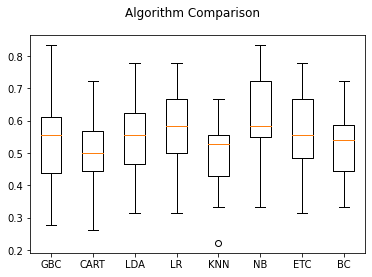

In [27]:
#####################################
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
# picking top three models that worked the best-Logistic Regression, Gaussian NB, Extra Tree Classifier

# Pipeline

In [28]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [29]:
ExtraTreesClassifier().get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
GaussianNB().get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [0]:
#construct pipelines
#Use standard scaling and PCA as pre-processing
#LogisticRegression
pipe_lr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('lr', LogisticRegression(random_state=123))])

#ExtraTreesClassifier
pipe_etc_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('etc', ExtraTreesClassifier())])

#GaussianNB
pipe_gnb_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('gnb', GaussianNB())])

In [0]:
param_range = [1, 2, 3]
param_range_fl = [1.0, 0.5, 0.1]

# Set grid search params
#LogisticRegression
grid_params_lr = [{'lr__penalty': ['l1', 'l2'],
                   'lr__C': param_range_fl,
									 'lr__solver': ['liblinear']}] 

#ExtraTreesClassifier
grid_params_etc = [{'etc__criterion': ['gini', 'entropy'],
										'etc__min_impurity_decrease': param_range,
										'etc__min_samples_leaf': param_range}]

#GaussianNB
grid_params_gnb = [{'gnb__var_smoothing': param_range}]

In [0]:
# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=10) 

gs_etc = GridSearchCV(estimator=pipe_etc_pca,
			param_grid=grid_params_etc,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_gnb = GridSearchCV(estimator=pipe_gnb_pca,
		    	param_grid=grid_params_gnb,
		    	scoring='accuracy',
		    	cv=10)

In [0]:
# List of pipelines for ease of iteration
grids = [gs_lr, gs_etc, gs_gnb]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Extra Trees Classifier' , 2: 'Gaussian Naive Bayes'}

In [35]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])
 
	# Fit grid search	
	gs.fit(X_train, Y_train)
 
	# Best params
	print('Best params: %s' % gs.best_params_)
 
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
 
	# Predict on test data with best params
	y_pred = gs.predict(X_validation)
 
	# Test data accuracy of model with best params(compare actual and predicted)
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(Y_validation, y_pred))
 
	# Track best (highest test accuracy) model
	if accuracy_score(Y_validation, y_pred) > best_acc:
		best_acc = accuracy_score(Y_validation, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'lr__C': 0.5, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best training accuracy: 0.594
Test set accuracy score for best params: 0.549 

Estimator: Extra Trees Classifier
Best params: {'etc__criterion': 'gini', 'etc__min_impurity_decrease': 1, 'etc__min_samples_leaf': 1}
Best training accuracy: 0.505
Test set accuracy score for best params: 0.473 

Estimator: Gaussian Naive Bayes
Best params: {'gnb__var_smoothing': 1}
Best training accuracy: 0.550
Test set accuracy score for best params: 0.538 

Classifier with best test set accuracy: Logistic Regression


In [0]:
#Use the best fitting model and architecture to predict the holdout data 
############################################
# Make predictions on validation dataset
#For the algorithm that performs the best, run the model on all training data and predict the holdout data
model1 = LogisticRegression(C = 0.5, penalty = 'l2', solver = 'liblinear')
model1.fit(X_train, Y_train)
predictions = model1.predict(X_validation)

In [37]:
#Accuracy metrics 
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5714285714285714
[[25 23]
 [16 27]]
              precision    recall  f1-score   support

           0       0.61      0.52      0.56        48
           1       0.54      0.63      0.58        43

    accuracy                           0.57        91
   macro avg       0.57      0.57      0.57        91
weighted avg       0.58      0.57      0.57        91

